In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [658]:
df = 'BBDD_Hospitalización.xlsx'
df = pd.read_excel(df, sheet_name='Datos', header=0)


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Se aplica un head para tener un vista previa de la base de datos

In [659]:
df.head(10)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
5,55.0,SI,SI,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3.0,0.0
6,53.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3.0,0.0
7,67.0,NO,NO,6.2,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2.0,0.0
8,69.0,NO,NO,6.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4.0,0.0
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0


Se usa un describe para ver un resumen estadistico de la base de datos.

In [660]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


Se crea un punto info para ver las columnas y él tipo de datos

In [661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Graficas

Se realizo una gráfica de dispersión con la varieble edad y el nivel de PSA en la sangre para identificar anomalias y así eliminarlas.
También se le imputara la media en las variables nulas.

In [662]:
df['EDAD'].fillna(63, inplace=True)

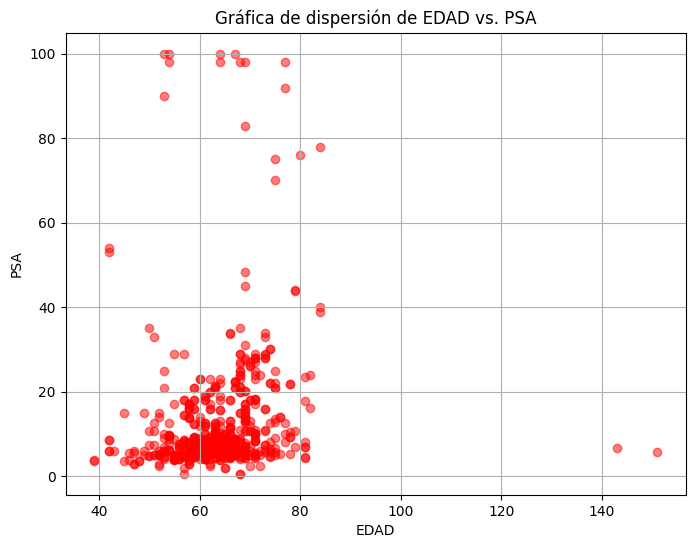

In [663]:
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.scatter(df['EDAD'], df['PSA'], color='red', alpha=0.5)  # Crear la gráfica de dispersión
plt.title('Gráfica de dispersión de EDAD vs. PSA')  # Título del gráfico
plt.xlabel('EDAD')  # Etiqueta del eje x
plt.ylabel('PSA')  # Etiqueta del eje y
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar gráfico

In [664]:
df = df[df['EDAD'] <= 120]

Se van a eliminar las columnas que no se consideran necesarias:


*   El número de muestras ya que no explica que algún sintoma o enfermedad del paciente.
*   El uso de cateteter urinario ya que no demuestra nada hacer el examén de esa forma



In [665]:
df = df.drop('NUMERO DE MUESTRAS TOMADAS', axis=1)
df = df.drop('CUP', axis=1)

Aquí se realizaran las converciones necesarias dicotomicas

In [666]:
diabetes_mapping = {"SI": 1, "NO": 0}

df["DIABETES"] = df["DIABETES"].map(diabetes_mapping)

In [667]:
hospitalizacion_ultimo_mes_mapping = {"SI": 1, "NO": 0}

df["HOSPITALIZACIÓN ULTIMO MES"] = df["HOSPITALIZACIÓN ULTIMO MES"].map(hospitalizacion_ultimo_mes_mapping)

In [668]:
biopsias_previas_mapping = {"SI": 1, "NO": 0}

df["BIOPSIAS PREVIAS"] = df["BIOPSIAS PREVIAS"].map(biopsias_previas_mapping)

In [669]:
VOLUMEN_PROSTATICO_mapping = {"SI": 1, "NO": 0}

df["VOLUMEN PROSTATICO"] = df["VOLUMEN PROSTATICO"].map(VOLUMEN_PROSTATICO_mapping)


In [670]:
fiebre_mapping = {"SI": 1, "NO": 0}

df["FIEBRE"] = df["FIEBRE"].map(fiebre_mapping)

In [671]:
ITU_mapping = {"SI": 1, "NO": 0}

df["ITU"] = df["ITU"].map(ITU_mapping)

In [672]:
HOSPITALIZACION_mapping = {"SI": 1, "NO": 0}

df["HOSPITALIZACION"] = df["HOSPITALIZACION"].map(HOSPITALIZACION_mapping)

De las siguientes variables se les inputara la media:


*   A PSA se le imputo la media ya qué no se está tan alejada de la desviación estandar



In [673]:
df['PSA'].fillna(13, inplace=True)

Una vez convertidas las variables dicotomicas, imputaremos las variables necesarias

In [674]:
df['BIOPSIAS PREVIAS'].fillna(0, inplace=True)

Con esta linea de codigo vamos a agregar 1 en la variable objetivo cuando el paciente haya estado algún día hospitalizado, ya qué tiene una correlación.
No es recomendable hacer cambios en la variable objetivo, pero en esta el cientifico de datos lo condera necesario

In [675]:
condicion = (df['DIAS HOSPITALIZACION MQ'] != 0) | (df['DIAS HOSPITALIZACIÓN UPC'] != 0)

# Usamos la función .loc para acceder a las filas y columnas que cumplen con la condición y modificamos la columna 'HOSPITALIZACION'
df.loc[condicion, 'HOSPITALIZACION'] = 1

Eliminamos los nulos de la variable objetivo

In [676]:
df = df.dropna(subset=['HOSPITALIZACION'], how='any')

Se decidio eliminar el nulo de volumen prostatico ya que este tiene un varinza muy alta y es un solo registro

In [677]:
df = df.dropna(subset=['VOLUMEN PROSTATICO'], how='any')

Las variables categoricas que quedaron se transformaran en variables dummy

In [678]:
df = pd.get_dummies(df)

KNN es un modelo de vecinos cercanos que es de aprendizaje supervisado que se usa para clasificación y regresión.
Este modelo se basa en suposición de datos similares qué están cerca en él espacio de las caracteristicas para hacer la predicción.
este modelo tiene hiperparametros: n_neighbors: En este se especifica el número de vecinos cercanos que se cosidera al realizar una predicción
weights: En este se determina con los valores uniform que le da el mismo peso a los vecinos en la decisión y distance que los vecinos más cercamos tiene mayor influencia en la predicción.

Vamos a separara el conjunto de entrenamiento y evaluación y coger los mejores parametros e hiperparametros

En los parametos no sé escogieron los parametros que indican los diás de hospitalización ya que es una variable ligada a la variable objetivo

In [679]:
features = ['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA', 'BIOPSIAS PREVIAS','VOLUMEN PROSTATICO','FIEBRE','ITU',
            'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO',
            'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO',
            'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICÓSIDO',
            'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OROQUINOLONAS',
            'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OTROS',
            'ENF. CRONICA PULMONAR OBSTRUCTIVA_NO',
            'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI',
            'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA',
            'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC',
            'BIOPSIA_ADENOCARCINOMA GLEASON 6',
            'BIOPSIA_ADENOCARCINOMA GLEASON 6',
            'BIOPSIA_ADENOCARCINOMA GLEASON 7',
            'BIOPSIA_ADENOCARCINOMA GLEASON 7',
            'BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS',
            'BIOPSIA_HIPERPLASIA PROSTATICA',
            'BIOPSIA_NEG',
            'BIOPSIA_PROSTATITIS',
            'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_1',
            'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_2',
            'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_3',
            'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_5',
            'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_9',
            'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_NO',
            'TIPO DE CULTIVO_HEMOCULTIVO',
            'TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO',
            'TIPO DE CULTIVO_NO',
            'TIPO DE CULTIVO_UROCULTIVO',
            'AGENTE AISLADO_E.COLI',
            'AGENTE AISLADO_NO',
            'AGENTE AISLADO_PSEUDOMONAS AERUGINOSA',
            'PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R',
            'PATRON DE RESISTENCIA_MULTI SENSIBLE',
            'PATRON DE RESISTENCIA_NO',
            'PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA',
            'PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA']

In [680]:
X = df[features]
y = df.HOSPITALIZACION

Aquí se define la instancia de entrenamiento y evaluación en la base de datos

In [681]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Aquí escalamos las caracteristicas del entrenamiento

In [682]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Creamos el clasificador

In [683]:
knn_classifier = KNeighborsClassifier()

Se escogiero como parametros

In [684]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

Aquí obtenemos los mejores hiperparametros

In [685]:
# Realizamos una búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)



Mejores hiperparámetros: {'n_neighbors': 3, 'weights': 'distance'}


Representa el número de vecinos más cercanos que se utilizarán para realizar una predicción o clasificación para un nuevo punto de datos. Es un hiperparámetro crucial en el algoritmo KNN y tiene un impacto significativo en cómo se hace la predicción.
Si la k=5 va a usar los 5 vecinos más cercanos
Y el hiperparametro distance hace que los más cercanos tienen mayor peso en la predicción

In [686]:
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')

Este es el entrenamiento del modelo

In [687]:
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

Aquí se realiza la predicción en él conjunto de prueba

In [688]:
y_pred = knn_classifier.predict(X_test_scaled)

Aquí calculamos la precisión del modelo

In [689]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy)

Precisión del modelo KNN: 1.0


Se realiza una matriz de confusión para conocer como se prevee con los datos de evaluación

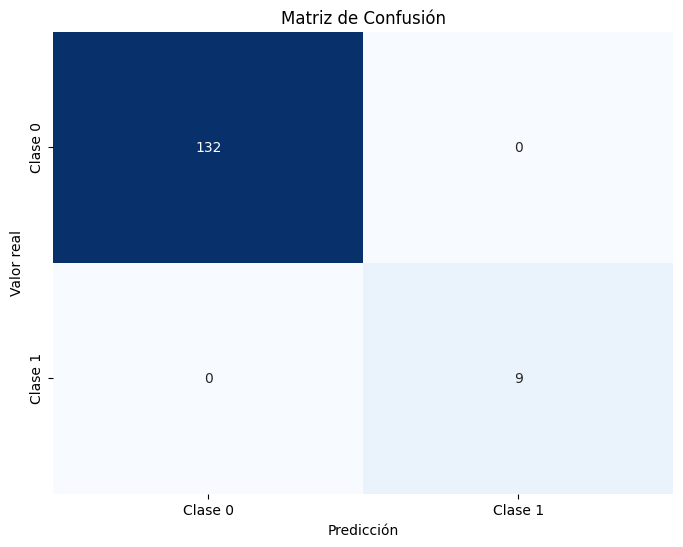

In [690]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()